# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera
## Title - Melbourne East vs Melbourne West
#### by Derrick Lim
#### 13/11/2020

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Melbourne, Australia enjoys its super rich diversity both culturally and socially. It attracts tourists from all around the world to experience its unique character and food culture. Due to the fact that Melbourne is identified as the most diverse city across Australia, it welcomes various kinds of food and beverages (F&B) services from various countries for its residents. 

The effect of historic events and the direction of urban development/growth has favoured more towards the eastern areas from the Central Business District (CBD) whilst the western and northern areas are less prioritised. This has caused a distinct segregated communities based on socio-economic status

The goal of this study is to understand what are the top food and drink premises found in which suburbs within Melbourne eastern suburbs and Melbourne Western suburbs. This is so that informed decisions can be made on what sort of F&B services should be pursued that the community likes. 

Research questions:
- Do Melbourne’s east and west have similar clusters of F&B services?
- Is there a frequent occurrence of the same type of businesses in both areas?
- What would be the best F&B services to be pursued in both west and east of Melbourne?

## Data <a name="data"></a>

Data of suburbs boundaries will be acquired from the Australian Bureau of Statistics (ABS). Moreover, metadata such as suburbs within melbourne western and eastern boundaries will be taken from the ABS Statistical Area Level 2 (SA2) areas. SA2 areas are used for the dissemination of population estimates and to provide a human perspective by using a scale that can be readily understood as a locality. 

A geographic information software known as QGIS will be used to visualise these spatial data and undertake a geoprocessing process to acquire the centroids (points) of each suburb as well as its latitude and longitude.

After that is done, the data will be exported to a CSV file for it to be read and further analyse it with python coding and jupyter notebook. 

In [1]:
import urllib

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Data Cleaning and Set up for Melb East and West

In [2]:
melb_suburb = pd.read_csv('LOCALITY_ABS.csv')
melb_suburb.head()

,LOCALITY,POSTCODE,LGA_NAME,xcoord,ycoord,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16
0,CARDIGAN VILLAGE,3352,BALLARAT,143.709721,-37.517478,201011001.0,21001.0,Alfredton,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,52.7111
1,ALFREDTON,3350,BALLARAT,143.800631,-37.555913,201011001.0,21001.0,Alfredton,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,52.7111
2,CARDIGAN,3352,BALLARAT,143.734845,-37.536613,201011001.0,21001.0,Alfredton,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,52.7111
3,LUCAS,3350,BALLARAT,143.769085,-37.554111,201011001.0,21001.0,Alfredton,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,52.7111
4,LAKE WENDOUREE,3350,BALLARAT,143.834014,-37.550156,201011002.0,21002.0,Ballarat,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,12.3787


In [3]:
melb_suburb.shape

(2973, 17)

In [4]:
melb_suburb = melb_suburb.rename(columns={'xcoord':'Longitude','ycoord':'Latitude'})
melb_suburb.head()

,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16
0,CARDIGAN VILLAGE,3352,BALLARAT,143.709721,-37.517478,201011001.0,21001.0,Alfredton,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,52.7111
1,ALFREDTON,3350,BALLARAT,143.800631,-37.555913,201011001.0,21001.0,Alfredton,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,52.7111
2,CARDIGAN,3352,BALLARAT,143.734845,-37.536613,201011001.0,21001.0,Alfredton,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,52.7111
3,LUCAS,3350,BALLARAT,143.769085,-37.554111,201011001.0,21001.0,Alfredton,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,52.7111
4,LAKE WENDOUREE,3350,BALLARAT,143.834014,-37.550156,201011002.0,21002.0,Ballarat,20101.0,Ballarat,201.0,Ballarat,2RVIC,Rest of Vic.,2.0,Victoria,12.3787


In [5]:
melb_suburb.drop(['SA2_MAIN16','SA2_5DIG16','SA3_CODE16','SA4_CODE16','GCC_CODE16','STE_CODE16','STE_NAME16','AREASQKM16'], axis=1,inplace=True)
melb_suburb.head()

,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16
0,CARDIGAN VILLAGE,3352,BALLARAT,143.709721,-37.517478,Alfredton,Ballarat,Ballarat,Rest of Vic.
1,ALFREDTON,3350,BALLARAT,143.800631,-37.555913,Alfredton,Ballarat,Ballarat,Rest of Vic.
2,CARDIGAN,3352,BALLARAT,143.734845,-37.536613,Alfredton,Ballarat,Ballarat,Rest of Vic.
3,LUCAS,3350,BALLARAT,143.769085,-37.554111,Alfredton,Ballarat,Ballarat,Rest of Vic.
4,LAKE WENDOUREE,3350,BALLARAT,143.834014,-37.550156,Ballarat,Ballarat,Ballarat,Rest of Vic.


##### SA4_NAME16 are attribute that contains the larger urban boundaries of Melbourne that segregate parts of it to east and west

In [6]:
melb_suburb['SA4_NAME16'].unique()
melb_suburb['SA4_NAME16'].value_counts().to_frame()

,SA4_NAME16
Latrobe - Gippsland,515
North West,455
Hume,338
Warrnambool and South West,319
Ballarat,279
Bendigo,219
Shepparton,158
Geelong,110
Melbourne - South East,94
Melbourne - Outer East,90


In [7]:
inner_east = melb_suburb[melb_suburb.SA4_NAME16 == 'Melbourne - Inner East' ].reset_index()
inner_east.head()

,index,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16
0,1511,ASHBURTON,3147,BOROONDARA,145.080182,-37.867299,Ashburton (Vic.),Boroondara,Melbourne - Inner East,Greater Melbourne
1,1512,DEEPDENE,3103,BOROONDARA,145.065860,-37.811414,Balwyn,Boroondara,Melbourne - Inner East,Greater Melbourne
2,1513,BALWYN,3103,BOROONDARA,145.083326,-37.809004,Balwyn,Boroondara,Melbourne - Inner East,Greater Melbourne
3,1514,BALWYN NORTH,3104,BOROONDARA,145.084342,-37.791759,Balwyn North,Boroondara,Melbourne - Inner East,Greater Melbourne
4,1515,CAMBERWELL,3124,BOROONDARA,145.073613,-37.838461,Camberwell,Boroondara,Melbourne - Inner East,Greater Melbourne


In [8]:
melb1 = folium.Map(
    location=[-37.815878, 145.071732],
    tiles='https://api.mapbox.com/styles/v1/mapbox/light-v10/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGV6emFsaW0iLCJhIjoiY2tkbnd3Zzc2MGc3NjJzbWgzbngxMXlkNSJ9.pFVcfTYbNJ02-eHHWzcNPg', 
    attr = 'Mapbox attribution',
    zoom_start = 12)

for lat, lng, LOCALITY, POSTCODE in zip(inner_east['Latitude'], inner_east['Longitude'], inner_east['LOCALITY'], inner_east['POSTCODE']):
    label = '{}, {}'.format(LOCALITY, POSTCODE)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='white',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(melb1)  
    
melb1

In [9]:
outer_east = melb_suburb[melb_suburb.SA4_NAME16 == 'Melbourne - Outer East' ].reset_index()
outer_east.head()

,index,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16
0,1714,BAYSWATER,3153,KNOX,145.264730,-37.845177,Bayswater,Knox,Melbourne - Outer East,Greater Melbourne
1,1715,KNOXFIELD,3180,KNOX,145.249380,-37.890564,Knoxfield - Scoresby,Knox,Melbourne - Outer East,Greater Melbourne
2,1716,SCORESBY,3179,KNOX,145.218847,-37.901742,Knoxfield - Scoresby,Knox,Melbourne - Outer East,Greater Melbourne
3,1717,ROWVILLE,3178,KNOX,145.243933,-37.924355,Rowville - Central,Knox,Melbourne - Outer East,Greater Melbourne
4,1718,WANTIRNA,3152,KNOX,145.225879,-37.852353,Wantirna,Knox,Melbourne - Outer East,Greater Melbourne


In [10]:
melb2 = folium.Map(
    location=[-37.815878, 145.071732],
    tiles='https://api.mapbox.com/styles/v1/mapbox/light-v10/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGV6emFsaW0iLCJhIjoiY2tkbnd3Zzc2MGc3NjJzbWgzbngxMXlkNSJ9.pFVcfTYbNJ02-eHHWzcNPg', 
    attr = 'Mapbox attribution',
    zoom_start = 12)

for lat, lng, LOCALITY, POSTCODE in zip(outer_east['Latitude'], outer_east['Longitude'], outer_east['LOCALITY'], outer_east['POSTCODE']):
    label = '{}, {}'.format(LOCALITY, POSTCODE)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='white',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(melb2)  
    
melb2

In [11]:
frames = [inner_east,outer_east]
melb_east = pd.concat(frames)

In [12]:
melb4 = folium.Map(
    location=[-37.815878, 145.071732],
    tiles='https://api.mapbox.com/styles/v1/mapbox/light-v10/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGV6emFsaW0iLCJhIjoiY2tkbnd3Zzc2MGc3NjJzbWgzbngxMXlkNSJ9.pFVcfTYbNJ02-eHHWzcNPg', 
    attr = 'Mapbox attribution',
    zoom_start =10)

for lat, lng, LOCALITY, POSTCODE in zip(melb_east['Latitude'], melb_east['Longitude'], melb_east['LOCALITY'], melb_east['POSTCODE']):
    label = '{}, {}'.format(LOCALITY, POSTCODE)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='white',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(melb4)  
    
melb4

In [13]:
melb_west = melb_suburb[melb_suburb.SA4_NAME16 == 'Melbourne - West' ].reset_index()
melb_west.head()

,index,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16
0,1898,ARDEER,3022,BRIMBANK,144.801525,-37.776214,Ardeer - Albion,Brimbank,Melbourne - West,Greater Melbourne
1,1899,ALBION,3020,BRIMBANK,144.816275,-37.776522,Ardeer - Albion,Brimbank,Melbourne - West,Greater Melbourne
2,1900,CAIRNLEA,3023,BRIMBANK,144.787859,-37.759474,Cairnlea,Brimbank,Melbourne - West,Greater Melbourne
3,1901,DEER PARK,3023,BRIMBANK,144.771699,-37.769369,Deer Park - Derrimut,Brimbank,Melbourne - West,Greater Melbourne
4,1902,DERRIMUT,3026,BRIMBANK,144.776048,-37.799712,Deer Park - Derrimut,Brimbank,Melbourne - West,Greater Melbourne


In [15]:
melb3 = folium.Map(
    location=[-37.815878, 145.071732],
    tiles='https://api.mapbox.com/styles/v1/mapbox/light-v10/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGV6emFsaW0iLCJhIjoiY2tkbnd3Zzc2MGc3NjJzbWgzbngxMXlkNSJ9.pFVcfTYbNJ02-eHHWzcNPg', 
    attr = 'Mapbox attribution',
    zoom_start = 10)

for lat, lng, LOCALITY, POSTCODE in zip(melb_west['Latitude'], melb_west['Longitude'], melb_west['LOCALITY'], melb_west['POSTCODE']):
    label = '{}, {}'.format(LOCALITY, POSTCODE)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='white',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(melb3)  
    
melb3

### Foursquare

#### limit search to only up to 100 venues

In [1]:
# @hidden_cell
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [17]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 400,
  'errorType': 'param_error',
  'errorDetail': 'Must provide parameters (ll and radius) or (sw and ne) or (near and radius) or (nearVenueId and ll) or (superVenueId) or (polygon)',
  'requestId': '5fae43ff3023093e6242ed95'},
 'response': {}}

### set radius to 500m as a walkable distance and catchment

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### MELBOURNE EASTERN SUBURBS

In [19]:
melb_east_venues = getNearbyVenues(names=melb_east['LOCALITY'],
                                   latitudes=melb_east['Latitude'],
                                   longitudes=melb_east['Longitude']
                                  )

ASHBURTON
DEEPDENE
BALWYN
BALWYN NORTH
CAMBERWELL
GLEN IRIS
HAWTHORN
HAWTHORN EAST
KEW
KEW EAST
SURREY HILLS
CANTERBURY
BULLEEN
DONCASTER
TEMPLESTOWE
TEMPLESTOWE LOWER
DONCASTER EAST
BLACKBURN
BLACKBURN NORTH
BLACKBURN SOUTH
BOX HILL SOUTH
BOX HILL
BOX HILL NORTH
MONT ALBERT NORTH
BURWOOD
BURWOOD EAST
MONT ALBERT
BAYSWATER
KNOXFIELD
SCORESBY
ROWVILLE
WANTIRNA
WANTIRNA SOUTH
BORONIA
FERNTREE GULLY
UPPER FERNTREE GULLY
THE BASIN
DONVALE
PARK ORCHARDS
WARRANDYTE
WONGA PARK
WARRANDYTE SOUTH
KILSYTH SOUTH
BAYSWATER NORTH
WARRANWOOD
CROYDON HILLS
CROYDON NORTH
RINGWOOD
HEATHMONT
RINGWOOD EAST
RINGWOOD NORTH
CROYDON
CROYDON SOUTH
FOREST HILL
MITCHAM
NUNAWADING
VERMONT
VERMONT SOUTH
BELGRAVE HEIGHTS
BELGRAVE SOUTH
LYSTERFIELD
SELBY
MENZIES CREEK
BELGRAVE
NARRE WARREN EAST
CHIRNSIDE PARK
STEELS CREEK
CHUM CREEK
DIXONS CREEK
FERNSHAW
YARRA GLEN
MOUNT TOOLEBEWONG
BADGER CREEK
HEALESVILLE
TARRAWARRA
KILSYTH
YERING
LILYDALE
COLDSTREAM
MACCLESFIELD
SILVAN
MONBULK
MONTROSE
MOOROOLBARK
KALLISTA
KALORA

In [181]:
print(melb_east_venues.shape)
melb_east_venues.head()

(559, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ASHBURTON,-37.867299,145.080182,Oak Room,-37.863794,145.082469,Café
1,ASHBURTON,-37.867299,145.080182,Two Seeds,-37.863410,145.078280,Café
2,ASHBURTON,-37.867299,145.080182,Ashburton Pool & Recreation Centre,-37.866676,145.085406,Pool
3,ASHBURTON,-37.867299,145.080182,Milk Cloud,-37.863458,145.080408,Café
4,ASHBURTON,-37.867299,145.080182,Chicken Central,-37.863390,145.078040,Fast Food Restaurant


In [182]:
melb_east_cat = melb_east_venues['Venue Category'].value_counts().to_frame()
melb_east_cat.shape

(131, 1)

In [183]:
print('There are {} uniques categories.'.format(len(melb_east_venues['Venue Category'].unique())))

There are 131 uniques categories.


In [184]:
melb_east_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ASHBURTON,8,8,8,8,8,8
BADGER CREEK,1,1,1,1,1,1
BALWYN,17,17,17,17,17,17
BALWYN NORTH,4,4,4,4,4,4
BAYSWATER,8,8,8,8,8,8
BAYSWATER NORTH,9,9,9,9,9,9
BELGRAVE,13,13,13,13,13,13
BELGRAVE HEIGHTS,3,3,3,3,3,3
BLACKBURN,13,13,13,13,13,13


In [185]:
melb_inner_top10 = melb_east_venues['Venue Category'].value_counts().to_frame()
melb_inner_top10 = melb_inner_top10.head(12)
melb_inner_top10

,Venue Category
Café,60
Fast Food Restaurant,21
Supermarket,19
Pizza Place,18
Grocery Store,17
Bakery,16
Chinese Restaurant,15
Park,14
Sandwich Place,13
Gym,12


In [186]:
df1 = melb_east_venues['Venue Category'].value_counts()[0:12].to_frame(name='frequency')
df1 = df1.reset_index()
df1.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
df1

,Venue Category,Frequency
0,Café,60
1,Fast Food Restaurant,21
2,Supermarket,19
3,Pizza Place,18
4,Grocery Store,17
5,Bakery,16
6,Chinese Restaurant,15
7,Park,14
8,Sandwich Place,13
9,Gym,12


<ipython-input-202-1f17b34344ce>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 10)


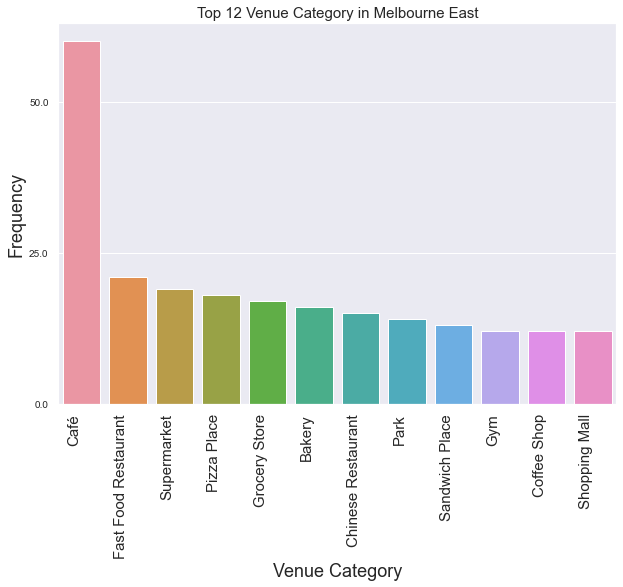

In [202]:
import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,7))

s = sns.barplot(x='Venue Category', y='Frequency', data =df1)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=15)
s.set_yticklabels(s.get_yticks(), size = 10)

plt.title('Top 12 Venue Category in Melbourne East', fontsize=15)
plt.xlabel("Venue Category", fontsize =18)
plt.ylabel("Frequency", fontsize =18)
plt.show()

In [203]:
df2 = melb_east_venues['Neighborhood'].value_counts()[0:12].to_frame(name='frequency')
df2 = df2.reset_index()
df2.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
df2

,Neighborhood,Frequency
0,BOX HILL,49
1,DONCASTER,48
2,RINGWOOD,29
3,HAWTHORN,26
4,NUNAWADING,24
5,KEW,21
6,BALWYN,17
7,BURWOOD EAST,16
8,DONCASTER EAST,14
9,BELGRAVE,13


<ipython-input-204-89c3e48a3e53>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 10)


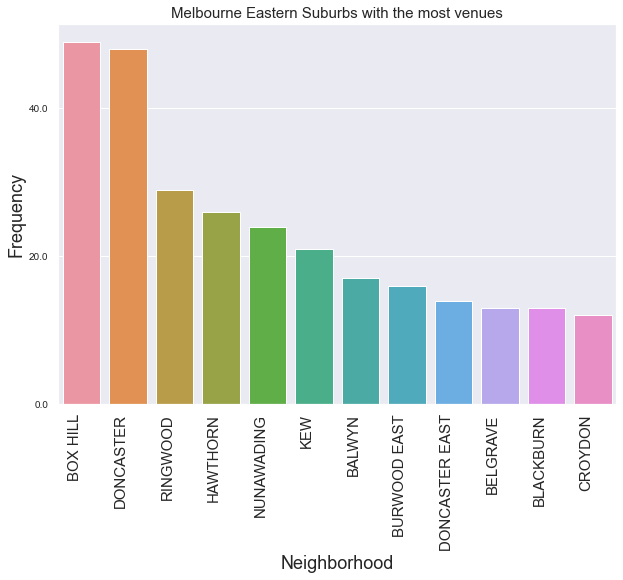

In [204]:
fig = plt.figure(figsize=(10,7))

s = sns.barplot(x='Neighborhood', y='Frequency', data =df2)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=15)
s.set_yticklabels(s.get_yticks(), size = 10)

plt.title('Melbourne Eastern Suburbs with the most venues', fontsize=15)
plt.xlabel("Neighborhood", fontsize =18)
plt.ylabel("Frequency", fontsize =18)
plt.show()

### Make dataframes for all top 10 venue category and exclude anything that is not food related

In [205]:
df_cafe = melb_east_venues[melb_east_venues['Venue Category'] == 'Café']
df_fast = melb_east_venues[melb_east_venues['Venue Category'] == 'Fast Food Restaurant']
df_super = melb_east_venues[melb_east_venues['Venue Category'] == 'Supermarket']
df_pizza = melb_east_venues[melb_east_venues['Venue Category'] == 'Pizza Place']
df_grocery = melb_east_venues[melb_east_venues['Venue Category'] == 'Grocery Store']
df_bakery = melb_east_venues[melb_east_venues['Venue Category'] == 'Bakery']
df_chinese = melb_east_venues[melb_east_venues['Venue Category'] == 'Chinese Restaurant']
#df_park = melb_east_venues[melb_east_venues['Venue Category'] == 'Park']
df_sandwich = melb_east_venues[melb_east_venues['Venue Category'] == 'Sandwich Place']
#df_gym = melb_east_venues[melb_east_venues['Venue Category'] == 'Gym']
df_coffee = melb_east_venues[melb_east_venues['Venue Category'] == 'Coffee Shop']
df_mall = melb_east_venues[melb_east_venues['Venue Category'] == 'Shopping Mall']

frames2 = [df_cafe,df_fast,df_super,df_pizza,df_grocery,df_bakery,df_chinese,df_sandwich,df_coffee,df_mall]

df_melb_inner_top10 = pd.concat(frames2)
df_melb_inner_top10.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ASHBURTON,-37.867299,145.080182,Oak Room,-37.863794,145.082469,Café
1,ASHBURTON,-37.867299,145.080182,Two Seeds,-37.863410,145.078280,Café
3,ASHBURTON,-37.867299,145.080182,Milk Cloud,-37.863458,145.080408,Café
8,DEEPDENE,-37.811414,145.065860,Town & Country,-37.810872,145.063846,Café
9,DEEPDENE,-37.811414,145.065860,Snow Pony,-37.811031,145.066099,Café


In [206]:
df3 = df_melb_inner_top10['Venue Category'].value_counts().to_frame(name='frequency')
df3 = df3.reset_index()
df3.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
df3

,Venue Category,Frequency
0,Café,60
1,Fast Food Restaurant,21
2,Supermarket,19
3,Pizza Place,18
4,Grocery Store,17
5,Bakery,16
6,Chinese Restaurant,15
7,Sandwich Place,13
8,Shopping Mall,12
9,Coffee Shop,12


<ipython-input-207-fe9c70c4536b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 10)


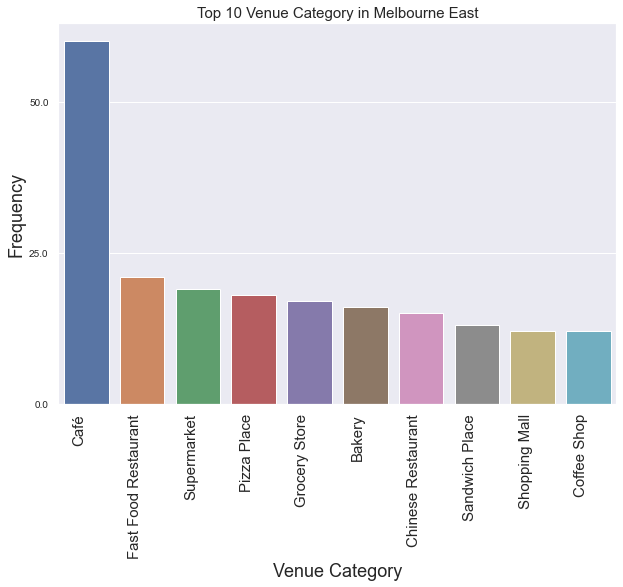

In [207]:
fig = plt.figure(figsize=(10,7))

s = sns.barplot(x='Venue Category', y='Frequency', data =df3)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=15)
s.set_yticklabels(s.get_yticks(), size = 10)

plt.title('Top 10 Venue Category in Melbourne East', fontsize=15)
plt.xlabel("Venue Category", fontsize =18)
plt.ylabel("Frequency", fontsize =18)
plt.show()

In [208]:
df4 = df_melb_inner_top10['Neighborhood'].value_counts().to_frame(name='frequency')
df4 = df4.reset_index()
df4.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
df4

,Neighborhood,Frequency
0,DONCASTER,15
1,RINGWOOD,13
2,BOX HILL,12
3,KEW,11
4,BURWOOD EAST,9
5,BLACKBURN,8
6,BELGRAVE,7
7,HAWTHORN,7
8,BALWYN,7
9,NUNAWADING,6


<ipython-input-212-43857274ea50>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 10)


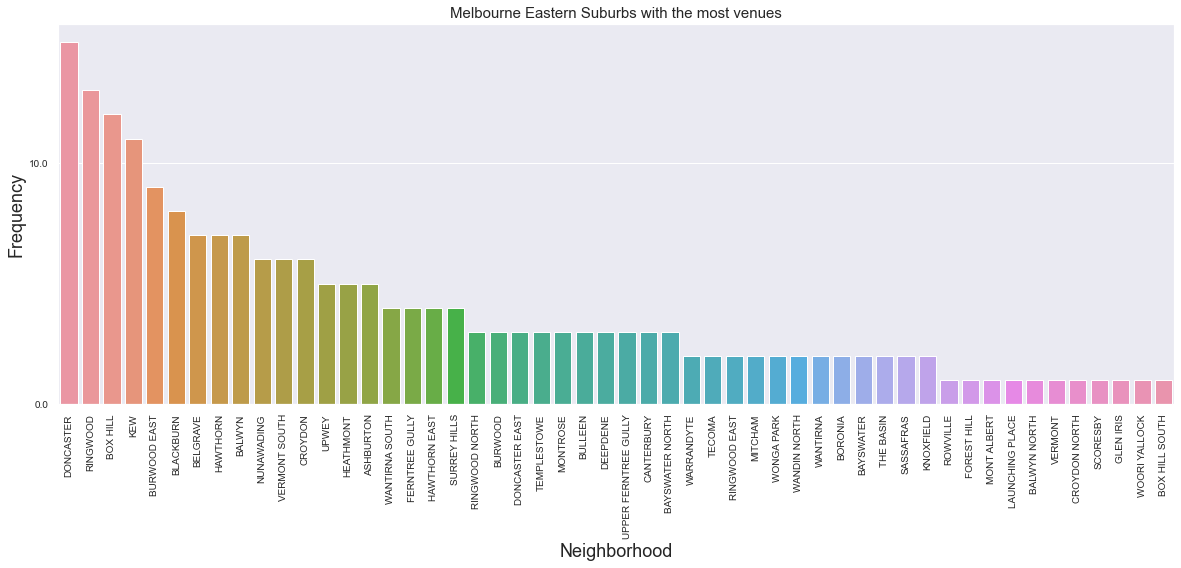

In [212]:
fig = plt.figure(figsize=(20,7))

s = sns.barplot(x='Neighborhood', y='Frequency', data =df4)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='center', fontsize=10)
s.set_yticklabels(s.get_yticks(), size = 10)

plt.title('Melbourne Eastern Suburbs with the most venues', fontsize=15)
plt.xlabel("Neighborhood", fontsize =18)
plt.ylabel("Frequency", fontsize =18)
plt.show()

### MELBOURNE WESTERN SUBURBS

In [213]:
melb_west_venues = getNearbyVenues(names=melb_west['LOCALITY'],
                                   latitudes=melb_west['Latitude'],
                                   longitudes=melb_west['Longitude']
                                  )

ARDEER
ALBION
CAIRNLEA
DEER PARK
DERRIMUT
DELAHEY
KEALBA
KEILOR DOWNS
ALBANVALE
KINGS PARK
ST ALBANS
SUNSHINE
SUNSHINE NORTH
BROOKLYN
SUNSHINE WEST
SYDENHAM
TAYLORS LAKES
CALDER PARK
KEILOR LODGE
KEILOR NORTH
ALTONA
SEAHOLME
ALTONA MEADOWS
ALTONA NORTH
SOUTH KINGSVILLE
NEWPORT
SPOTSWOOD
SEABROOK
WILLIAMSTOWN
WILLIAMSTOWN NORTH
BRAYBROOK
MAIDSTONE
FOOTSCRAY
MARIBYRNONG
KINGSVILLE
SEDDON
WEST FOOTSCRAY
TOTTENHAM
YARRAVILLE
LONG FOREST
HOPETOUN PARK
COIMADAI
BACCHUS MARSH
MERRIMU
MADDINGLEY
PENTLAND HILLS
DARLEY
PLUMPTON
BONNIE BROOK
HILLSIDE (GREATER MELBOURNE)
DEANSIDE
FRASER RISE
TOOLERN VALE
MELTON
KURUNJANG
MELTON SOUTH
STRATHTULLOH
WEIR VIEWS
BROOKFIELD
EYNESBURY
EXFORD
COBBLEBANK
MELTON WEST
HARKNESS
GRANGEFIELDS
MOUNT COTTRELL
ROCKBANK
RAVENHALL
AINTREE
FIELDSTONE
THORNHILL PARK
TRUGANINA
TAYLORS HILL
BURNSIDE
BURNSIDE HEIGHTS
CAROLINE SPRINGS
HOPPERS CROSSING
WILLIAMS LANDING
LAVERTON
LAVERTON NORTH
TARNEIT
WERRIBEE SOUTH
COCOROC
MANOR LAKES
QUANDONG
WYNDHAM VALE
POINT COOK
WERRI

In [214]:
print(melb_west_venues.shape)
melb_west_venues.head()

(331, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ARDEER,-37.776214,144.801525,West City Cafe,-37.773139,144.803163,Café
1,ARDEER,-37.776214,144.801525,Australia Post,-37.773163,144.799432,Post Office
2,ARDEER,-37.776214,144.801525,Sunshine Motor Inn,-37.773029,144.804246,Motel
3,ARDEER,-37.776214,144.801525,Importers Salvage Centre,-37.772225,144.802212,Gift Shop
4,ALBION,-37.776522,144.816275,Mitko Deli & Cafe,-37.777176,144.815110,Deli / Bodega


In [216]:
melb_west_cat = melb_west_venues['Venue Category'].value_counts().to_frame()
melb_west_cat.shape

(113, 1)

In [218]:
print('There are {} uniques categories.'.format(len(melb_west_venues['Venue Category'].unique())))

There are 113 uniques categories.


In [219]:
melb_west_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AINTREE,1,1,1,1,1,1
ALBANVALE,2,2,2,2,2,2
ALBION,3,3,3,3,3,3
ALTONA,5,5,5,5,5,5
ALTONA MEADOWS,4,4,4,4,4,4
ALTONA NORTH,2,2,2,2,2,2
ARDEER,4,4,4,4,4,4
BACCHUS MARSH,2,2,2,2,2,2
BRAYBROOK,1,1,1,1,1,1


In [221]:
melb_west_top10 = melb_west_venues['Venue Category'].value_counts().to_frame()
melb_west_top10 = melb_west_top10.head(14)
melb_west_top10

,Venue Category
Café,39
Vietnamese Restaurant,14
Pizza Place,13
Park,13
Bakery,9
Gym,9
Convenience Store,8
Fast Food Restaurant,8
Shopping Mall,7
Home Service,6


### Arranging Top 10 and exclude non related food venues

In [222]:
wdf_cafe = melb_west_venues[melb_west_venues['Venue Category'] == 'Café']
wdf_viet = melb_west_venues[melb_west_venues['Venue Category'] == 'Vietnamese Restaurant']
wdf_pizza = melb_west_venues[melb_west_venues['Venue Category'] == 'Pizza Place']
wdf_bakery = melb_west_venues[melb_west_venues['Venue Category'] == 'Bakery']
wdf_store = melb_west_venues[melb_west_venues['Venue Category'] == 'Convenience Store']
wdf_fast = melb_west_venues[melb_west_venues['Venue Category'] == 'Fast Food Restaurant']
wdf_shopping = melb_west_venues[melb_west_venues['Venue Category'] == 'Shopping Mall']
wdf_super = melb_west_venues[melb_west_venues['Venue Category'] == 'Supermarket']
wdf_chinese = melb_west_venues[melb_west_venues['Venue Category'] == 'Chinese Restaurant']
wdf_coffee = melb_west_venues[melb_west_venues['Venue Category'] == 'Coffee Shop']

frames3 = [wdf_cafe,wdf_viet,wdf_pizza,wdf_bakery,wdf_store,wdf_fast,wdf_shopping,wdf_super,wdf_chinese,wdf_coffee]

df_melb_west_top10 = pd.concat(frames3)
df_melb_west_top10.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ARDEER,-37.776214,144.801525,West City Cafe,-37.773139,144.803163,Café
5,ALBION,-37.776522,144.816275,Sadie Black,-37.776960,144.814950,Café
14,CAIRNLEA,-37.759474,144.787859,Cafe Oliveto,-37.758170,144.790466,Café
24,DEER PARK,-37.769369,144.771699,Pane e Latte,-37.770350,144.773930,Café
55,BROOKLYN,-37.816096,144.841484,Brooklyn Cafe,-37.819170,144.839621,Café


In [223]:
df5 = df_melb_west_top10['Venue Category'].value_counts().to_frame(name='frequency')
df5 = df5.reset_index()
df5.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
df5

,Venue Category,Frequency
0,Café,39
1,Vietnamese Restaurant,14
2,Pizza Place,13
3,Bakery,9
4,Fast Food Restaurant,8
5,Convenience Store,8
6,Shopping Mall,7
7,Supermarket,6
8,Chinese Restaurant,6
9,Coffee Shop,5


<ipython-input-225-1568875cc9d9>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 10)


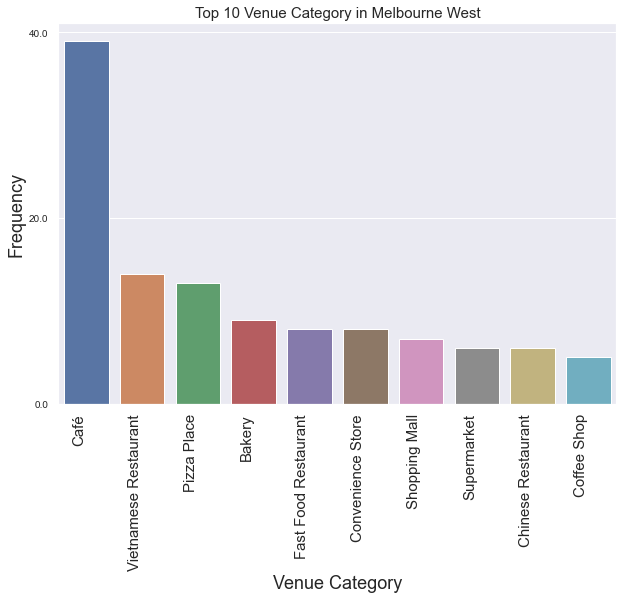

In [225]:
fig = plt.figure(figsize=(10,7))

s = sns.barplot(x='Venue Category', y='Frequency', data =df5)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=15)
s.set_yticklabels(s.get_yticks(), size = 10)

plt.title('Top 10 Venue Category in Melbourne West', fontsize=15)
plt.xlabel("Venue Category", fontsize =18)
plt.ylabel("Frequency", fontsize =18)
plt.show()

In [226]:
df6 = df_melb_west_top10['Neighborhood'].value_counts().to_frame(name='frequency')
df6 = df6.reset_index()
df6.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
df6

,Neighborhood,Frequency
0,FOOTSCRAY,21
1,SEDDON,14
2,MARIBYRNONG,13
3,NEWPORT,6
4,DEER PARK,5
5,SUNSHINE,5
6,KINGSVILLE,4
7,KEILOR LODGE,4
8,SPOTSWOOD,4
9,CAIRNLEA,3


<ipython-input-228-b27f78d656a2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 10)


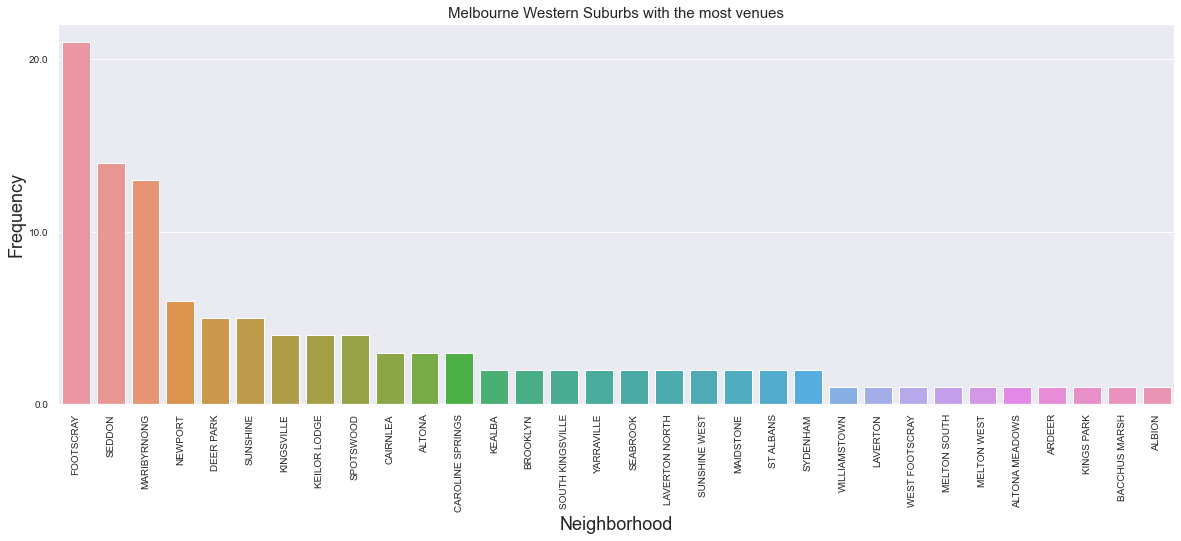

In [228]:
fig = plt.figure(figsize=(20,7))

s = sns.barplot(x='Neighborhood', y='Frequency', data =df6)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='center', fontsize=10)
s.set_yticklabels(s.get_yticks(), size = 10)

plt.title('Melbourne Western Suburbs with the most venues', fontsize=15)
plt.xlabel("Neighborhood", fontsize =18)
plt.ylabel("Frequency", fontsize =18)
plt.show()

## Methodology <a name="methodology"></a>

### Clustering

### Melbourne East

In [229]:
# one hot encoding
melb_inner_onehot = pd.get_dummies(df_melb_inner_top10[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melb_inner_onehot['Neighborhood'] = df_melb_inner_top10['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [melb_inner_onehot.columns[-1]] + list(melb_inner_onehot.columns[:-1])
melb_inner_onehot = melb_inner_onehot[fixed_columns]

melb_inner_onehot.head()

,Neighborhood,Bakery,Café,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Grocery Store,Pizza Place,Sandwich Place,Shopping Mall,Supermarket
0,ASHBURTON,0,1,0,0,0,0,0,0,0,0
1,ASHBURTON,0,1,0,0,0,0,0,0,0,0
3,ASHBURTON,0,1,0,0,0,0,0,0,0,0
8,DEEPDENE,0,1,0,0,0,0,0,0,0,0
9,DEEPDENE,0,1,0,0,0,0,0,0,0,0


In [230]:
melb_inner_grouped = melb_inner_onehot.groupby('Neighborhood').mean().reset_index()
melb_inner_grouped.head()

,Neighborhood,Bakery,Café,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Grocery Store,Pizza Place,Sandwich Place,Shopping Mall,Supermarket
0,ASHBURTON,0.200000,0.600000,0.0,0.0,0.200000,0.000000,0.0,0.000000,0.0,0.000000
1,BALWYN,0.142857,0.428571,0.0,0.0,0.000000,0.142857,0.0,0.142857,0.0,0.142857
2,BALWYN NORTH,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.000000
3,BAYSWATER,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000
4,BAYSWATER NORTH,0.000000,0.000000,0.0,0.0,0.666667,0.000000,0.0,0.333333,0.0,0.000000


In [231]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [232]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = melb_inner_grouped['Neighborhood']

for ind in np.arange(melb_inner_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melb_inner_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ASHBURTON,Café,Fast Food Restaurant,Bakery,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant
1,BALWYN,Café,Supermarket,Sandwich Place,Grocery Store,Bakery,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant
2,BALWYN NORTH,Shopping Mall,Supermarket,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
3,BAYSWATER,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
4,BAYSWATER NORTH,Fast Food Restaurant,Sandwich Place,Supermarket,Shopping Mall,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant,Café,Bakery


In [233]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 7

melb_inner_grouped_clustering = melb_inner_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melb_inner_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 0, 4, 6, 3, 3, 6, 4, 1])

In [234]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

melb_inner_merged = melb_east

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
melb_inner_merged = melb_inner_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='LOCALITY')

melb_inner_merged.head() # check the last columns!

,index,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1511,ASHBURTON,3147,BOROONDARA,145.080182,-37.867299,Ashburton (Vic.),Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Fast Food Restaurant,Bakery,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant
1,1512,DEEPDENE,3103,BOROONDARA,145.065860,-37.811414,Balwyn,Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Pizza Place,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
2,1513,BALWYN,3103,BOROONDARA,145.083326,-37.809004,Balwyn,Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Supermarket,Sandwich Place,Grocery Store,Bakery,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant
3,1514,BALWYN NORTH,3104,BOROONDARA,145.084342,-37.791759,Balwyn North,Boroondara,Melbourne - Inner East,Greater Melbourne,0.0,Shopping Mall,Supermarket,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
4,1515,CAMBERWELL,3124,BOROONDARA,145.073613,-37.838461,Camberwell,Boroondara,Melbourne - Inner East,Greater Melbourne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
melb_inner_merged['Cluster Labels'].value_counts().to_frame()

,Cluster Labels
3.0,15
6.0,10
4.0,8
2.0,6
0.0,6
1.0,5
5.0,2


In [236]:
melb_inner_merged2 = melb_inner_merged.dropna(subset=["Cluster Labels"], axis=0) 
melb_inner_merged2['Cluster Labels'].unique()
melb_inner_merged2["Cluster Labels"] = melb_inner_merged2["Cluster Labels"].astype("int")

<ipython-input-236-64cac1c69492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_inner_merged2["Cluster Labels"] = melb_inner_merged2["Cluster Labels"].astype("int")


In [289]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
melb_east_clusters = folium.Map(location=[-37.815878, 145.071732], 
                          tiles='https://api.mapbox.com/styles/v1/mapbox/light-v10/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGV6emFsaW0iLCJhIjoiY2tkbnd3Zzc2MGc3NjJzbWgzbngxMXlkNSJ9.pFVcfTYbNJ02-eHHWzcNPg', 
                          attr = 'Mapbox attribution',
                          zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.Set1(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melb_inner_merged2['Latitude'], melb_inner_merged2['Longitude'], melb_inner_merged2['LOCALITY'], melb_inner_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        weight = 3,
        color = rainbow[(cluster)-1],
        popup=label,
        fill=True,
        fill_color=rainbow[(cluster)-1],
        fill_opacity=1).add_to(melb_east_clusters)
       
melb_east_clusters

### Melbourne West

In [239]:
# one hot encoding
melb_west_onehot = pd.get_dummies(df_melb_west_top10[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melb_west_onehot['Neighborhood'] = df_melb_west_top10['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [melb_west_onehot.columns[-1]] + list(melb_west_onehot.columns[:-1])
melb_west_onehot = melb_west_onehot[fixed_columns]

melb_west_onehot.head()

,Neighborhood,Bakery,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Fast Food Restaurant,Pizza Place,Shopping Mall,Supermarket,Vietnamese Restaurant
0,ARDEER,0,1,0,0,0,0,0,0,0,0
5,ALBION,0,1,0,0,0,0,0,0,0,0
14,CAIRNLEA,0,1,0,0,0,0,0,0,0,0
24,DEER PARK,0,1,0,0,0,0,0,0,0,0
55,BROOKLYN,0,1,0,0,0,0,0,0,0,0


In [240]:
melb_west_grouped = melb_west_onehot.groupby('Neighborhood').mean().reset_index()
melb_west_grouped.head()

,Neighborhood,Bakery,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Fast Food Restaurant,Pizza Place,Shopping Mall,Supermarket,Vietnamese Restaurant
0,ALBION,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,ALTONA,0.0,0.666667,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
2,ALTONA MEADOWS,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
3,ARDEER,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,BACCHUS MARSH,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [241]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Neighborhood'] = melb_west_grouped['Neighborhood']

for ind in np.arange(melb_west_grouped.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(melb_west_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALBION,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
1,ALTONA,Café,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
2,ALTONA MEADOWS,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
3,ARDEER,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
4,BACCHUS MARSH,Bakery,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Café


In [242]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 7

melb_west_grouped_clustering = melb_west_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melb_west_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 2, 3, 0, 3, 4, 4, 5, 5])

In [243]:
# add clustering labels
neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans.labels_)

melb_west_merged = melb_west

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
melb_west_merged = melb_west_merged.join(neighborhoods_venues_sorted2.set_index('Neighborhood'), on='LOCALITY')

melb_west_merged.head() # check the last columns!

,index,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1898,ARDEER,3022,BRIMBANK,144.801525,-37.776214,Ardeer - Albion,Brimbank,Melbourne - West,Greater Melbourne,3.0,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
1,1899,ALBION,3020,BRIMBANK,144.816275,-37.776522,Ardeer - Albion,Brimbank,Melbourne - West,Greater Melbourne,3.0,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
2,1900,CAIRNLEA,3023,BRIMBANK,144.787859,-37.759474,Cairnlea,Brimbank,Melbourne - West,Greater Melbourne,4.0,Supermarket,Shopping Mall,Café,Vietnamese Restaurant,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
3,1901,DEER PARK,3023,BRIMBANK,144.771699,-37.769369,Deer Park - Derrimut,Brimbank,Melbourne - West,Greater Melbourne,5.0,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Café,Supermarket,Shopping Mall,Fast Food Restaurant,Convenience Store,Coffee Shop,Bakery
4,1902,DERRIMUT,3026,BRIMBANK,144.776048,-37.799712,Deer Park - Derrimut,Brimbank,Melbourne - West,Greater Melbourne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
melb_west_merged['Cluster Labels'].value_counts().to_frame()

,Cluster Labels
3.0,9
5.0,5
4.0,5
0.0,4
2.0,4
1.0,3
6.0,2


In [245]:
melb_west_merged2 = melb_west_merged.dropna(subset=["Cluster Labels"], axis=0) 
melb_west_merged2['Cluster Labels'].unique()
melb_west_merged2["Cluster Labels"] = melb_west_merged2["Cluster Labels"].astype("int")

<ipython-input-245-e613cf1a77bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_west_merged2["Cluster Labels"] = melb_west_merged2["Cluster Labels"].astype("int")


In [290]:
# create map
melb_west_clusters = folium.Map(location=[-37.815878, 145.071732], 
                          tiles='https://api.mapbox.com/styles/v1/mapbox/light-v10/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGV6emFsaW0iLCJhIjoiY2tkbnd3Zzc2MGc3NjJzbWgzbngxMXlkNSJ9.pFVcfTYbNJ02-eHHWzcNPg', 
                          attr = 'Mapbox attribution',
                          zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.Set1(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melb_west_merged2['Latitude'], melb_west_merged2['Longitude'], melb_west_merged2['LOCALITY'], melb_west_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        weight = 3,
        color = rainbow[(cluster)-1],
        popup=label,
        fill=True,
        fill_color=rainbow[(cluster)-1],
        fill_opacity=1).add_to(melb_west_clusters)
       
melb_west_clusters

## Analysis <a name="analysis"></a>

### Melbourne East

In [249]:
melb_inner_merged.loc[melb_inner_merged['Cluster Labels'] == 0, melb_inner_merged.columns[[1] + list(range(5, melb_inner_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,BALWYN NORTH,-37.791759,Balwyn North,Boroondara,Melbourne - Inner East,Greater Melbourne,0.0,Shopping Mall,Supermarket,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
4,WANTIRNA,-37.852353,Wantirna,Knox,Melbourne - Outer East,Greater Melbourne,0.0,Pizza Place,Coffee Shop,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Chinese Restaurant,Café,Bakery
13,WONGA PARK,-37.735556,Warrandyte - Wonga Park,Manningham - East,Melbourne - Outer East,Greater Melbourne,0.0,Shopping Mall,Grocery Store,Supermarket,Sandwich Place,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
21,HEATHMONT,-37.830795,Ringwood East,Maroondah,Melbourne - Outer East,Greater Melbourne,0.0,Shopping Mall,Grocery Store,Coffee Shop,Café,Bakery,Supermarket,Sandwich Place,Pizza Place,Fast Food Restaurant,Chinese Restaurant
22,RINGWOOD EAST,-37.813311,Ringwood East,Maroondah,Melbourne - Outer East,Greater Melbourne,0.0,Grocery Store,Coffee Shop,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Café,Bakery
23,RINGWOOD NORTH,-37.793053,Ringwood North,Maroondah,Melbourne - Outer East,Greater Melbourne,0.0,Shopping Mall,Grocery Store,Coffee Shop,Supermarket,Sandwich Place,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Café,Bakery


In [250]:
melb_inner_merged.loc[melb_inner_merged['Cluster Labels'] == 1, melb_inner_merged.columns[[1] + list(range(5, melb_inner_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,GLEN IRIS,-37.855977,Glen Iris - East,Boroondara,Melbourne - Inner East,Greater Melbourne,1.0,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
20,BOX HILL SOUTH,-37.836619,Box Hill,Whitehorse - West,Melbourne - Inner East,Greater Melbourne,1.0,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
2,SCORESBY,-37.901742,Knoxfield - Scoresby,Knox,Melbourne - Outer East,Greater Melbourne,1.0,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
9,THE BASIN,-37.855414,The Basin,Knox,Melbourne - Outer East,Greater Melbourne,1.0,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
61,SASSAFRAS,-37.863534,Mount Dandenong - Olinda,Yarra Ranges,Melbourne - Outer East,Greater Melbourne,1.0,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery


In [252]:
melb_inner_merged.loc[melb_inner_merged['Cluster Labels'] == 2, melb_inner_merged.columns[[1] + list(range(5, melb_inner_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,BULLEEN,-37.768659,Bulleen,Manningham - West,Melbourne - Inner East,Greater Melbourne,2.0,Pizza Place,Fast Food Restaurant,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Coffee Shop,Chinese Restaurant,Café,Bakery
26,MONT ALBERT,-37.817683,Surrey Hills (East) - Mont Albert,Whitehorse - West,Melbourne - Inner East,Greater Melbourne,2.0,Pizza Place,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
19,CROYDON NORTH,-37.771864,Croydon Hills - Warranwood,Maroondah,Melbourne - Outer East,Greater Melbourne,2.0,Pizza Place,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
27,MITCHAM,-37.818179,Mitcham (Vic.),Whitehorse - East,Melbourne - Outer East,Greater Melbourne,2.0,Pizza Place,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
29,VERMONT,-37.838459,Vermont,Whitehorse - East,Melbourne - Outer East,Greater Melbourne,2.0,Pizza Place,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
79,WOORI YALLOCK,-37.781091,Yarra Valley,Yarra Ranges,Melbourne - Outer East,Greater Melbourne,2.0,Pizza Place,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery


In [253]:
melb_inner_merged.loc[melb_inner_merged['Cluster Labels'] == 3, melb_inner_merged.columns[[1] + list(range(5, melb_inner_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ASHBURTON,-37.867299,Ashburton (Vic.),Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Fast Food Restaurant,Bakery,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant
1,DEEPDENE,-37.811414,Balwyn,Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Pizza Place,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
2,BALWYN,-37.809004,Balwyn,Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Supermarket,Sandwich Place,Grocery Store,Bakery,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant
6,HAWTHORN,-37.824802,Hawthorn,Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Pizza Place,Grocery Store,Fast Food Restaurant,Supermarket,Shopping Mall,Sandwich Place,Coffee Shop,Chinese Restaurant,Bakery
7,HAWTHORN EAST,-37.831198,Hawthorn East,Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Pizza Place,Coffee Shop,Supermarket,Shopping Mall,Sandwich Place,Grocery Store,Fast Food Restaurant,Chinese Restaurant,Bakery
10,SURREY HILLS,-37.826744,Surrey Hills (West) - Canterbury,Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Supermarket,Bakery,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant
11,CANTERBURY,-37.823607,Surrey Hills (West) - Canterbury,Boroondara,Melbourne - Inner East,Greater Melbourne,3.0,Café,Bakery,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant
13,DONCASTER,-37.784795,Doncaster,Manningham - West,Melbourne - Inner East,Greater Melbourne,3.0,Café,Supermarket,Sandwich Place,Coffee Shop,Chinese Restaurant,Shopping Mall,Fast Food Restaurant,Pizza Place,Grocery Store,Bakery
14,TEMPLESTOWE,-37.753999,Templestowe,Manningham - West,Melbourne - Inner East,Greater Melbourne,3.0,Chinese Restaurant,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Bakery
17,BLACKBURN,-37.821695,Blackburn,Whitehorse - West,Melbourne - Inner East,Greater Melbourne,3.0,Café,Sandwich Place,Grocery Store,Coffee Shop,Bakery,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Chinese Restaurant


In [254]:
melb_inner_merged.loc[melb_inner_merged['Cluster Labels'] == 4, melb_inner_merged.columns[[1] + list(range(5, melb_inner_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,DONCASTER EAST,-37.778976,Doncaster East (North),Manningham - West,Melbourne - Inner East,Greater Melbourne,4.0,Fast Food Restaurant,Chinese Restaurant,Bakery,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Coffee Shop,Café
21,BOX HILL,-37.821522,Box Hill,Whitehorse - West,Melbourne - Inner East,Greater Melbourne,4.0,Chinese Restaurant,Bakery,Supermarket,Shopping Mall,Pizza Place,Grocery Store,Café,Sandwich Place,Fast Food Restaurant,Coffee Shop
0,BAYSWATER,-37.845177,Bayswater,Knox,Melbourne - Outer East,Greater Melbourne,4.0,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
1,KNOXFIELD,-37.890564,Knoxfield - Scoresby,Knox,Melbourne - Outer East,Greater Melbourne,4.0,Grocery Store,Bakery,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café
30,VERMONT SOUTH,-37.854386,Vermont South,Whitehorse - East,Melbourne - Outer East,Greater Melbourne,4.0,Supermarket,Bakery,Shopping Mall,Chinese Restaurant,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Café
67,TECOMA,-37.904613,Upwey - Tecoma,Yarra Ranges,Melbourne - Outer East,Greater Melbourne,4.0,Fast Food Restaurant,Bakery,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant,Café
68,UPWEY,-37.905492,Upwey - Tecoma,Yarra Ranges,Melbourne - Outer East,Greater Melbourne,4.0,Supermarket,Grocery Store,Chinese Restaurant,Café,Bakery,Shopping Mall,Sandwich Place,Pizza Place,Fast Food Restaurant,Coffee Shop
81,LAUNCHING PLACE,-37.778038,Yarra Valley,Yarra Ranges,Melbourne - Outer East,Greater Melbourne,4.0,Bakery,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café


In [255]:
melb_inner_merged.loc[melb_inner_merged['Cluster Labels'] == 5, melb_inner_merged.columns[[1] + list(range(5, melb_inner_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,ROWVILLE,-37.924355,Rowville - Central,Knox,Melbourne - Outer East,Greater Melbourne,5.0,Sandwich Place,Supermarket,Shopping Mall,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
26,FOREST HILL,-37.839868,Forest Hill,Whitehorse - East,Melbourne - Outer East,Greater Melbourne,5.0,Sandwich Place,Supermarket,Shopping Mall,Pizza Place,Grocery Store,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery


In [256]:
melb_inner_merged.loc[melb_inner_merged['Cluster Labels'] == 6, melb_inner_merged.columns[[1] + list(range(5, melb_inner_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,KEW,-37.803428,Kew,Boroondara,Melbourne - Inner East,Greater Melbourne,6.0,Café,Grocery Store,Fast Food Restaurant,Chinese Restaurant,Supermarket,Sandwich Place,Shopping Mall,Pizza Place,Coffee Shop,Bakery
5,WANTIRNA SOUTH,-37.873891,Wantirna South,Knox,Melbourne - Outer East,Greater Melbourne,6.0,Pizza Place,Grocery Store,Fast Food Restaurant,Chinese Restaurant,Supermarket,Shopping Mall,Sandwich Place,Coffee Shop,Café,Bakery
6,BORONIA,-37.856201,Boronia,Knox,Melbourne - Outer East,Greater Melbourne,6.0,Fast Food Restaurant,Coffee Shop,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Chinese Restaurant,Café,Bakery
7,FERNTREE GULLY,-37.884360,Ferntree Gully (South) - Upper Ferntree Gully,Knox,Melbourne - Outer East,Greater Melbourne,6.0,Supermarket,Fast Food Restaurant,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant,Café,Bakery
8,UPPER FERNTREE GULLY,-37.898099,Ferntree Gully (South) - Upper Ferntree Gully,Knox,Melbourne - Outer East,Greater Melbourne,6.0,Shopping Mall,Fast Food Restaurant,Café,Supermarket,Sandwich Place,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant,Bakery
16,BAYSWATER NORTH,-37.826894,Bayswater North,Maroondah,Melbourne - Outer East,Greater Melbourne,6.0,Fast Food Restaurant,Sandwich Place,Supermarket,Shopping Mall,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant,Café,Bakery
20,RINGWOOD,-37.811518,Ringwood,Maroondah,Melbourne - Outer East,Greater Melbourne,6.0,Fast Food Restaurant,Coffee Shop,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Chinese Restaurant,Bakery
28,NUNAWADING,-37.817361,Nunawading,Whitehorse - East,Melbourne - Outer East,Greater Melbourne,6.0,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Fast Food Restaurant,Café,Supermarket,Coffee Shop,Chinese Restaurant,Bakery
55,MONTROSE,-37.812508,Montrose,Yarra Ranges,Melbourne - Outer East,Greater Melbourne,6.0,Grocery Store,Fast Food Restaurant,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Coffee Shop,Chinese Restaurant,Bakery
69,WANDIN NORTH,-37.780903,Wandin - Seville,Yarra Ranges,Melbourne - Outer East,Greater Melbourne,6.0,Fast Food Restaurant,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Coffee Shop,Chinese Restaurant,Bakery


### Melbourne West

In [258]:
melb_west_merged.loc[melb_west_merged['Cluster Labels'] == 0, melb_west_merged.columns[[1] + list(range(5, melb_inner_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,SOUTH KINGSVILLE,-37.830695,Newport,Hobsons Bay,Melbourne - West,Greater Melbourne,0.0,Pizza Place,Bakery,Vietnamese Restaurant,Supermarket,Shopping Mall,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Café
26,SPOTSWOOD,-37.829615,Newport,Hobsons Bay,Melbourne - West,Greater Melbourne,0.0,Café,Bakery,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant
38,YARRAVILLE,-37.817943,Yarraville,Maribyrnong,Melbourne - West,Greater Melbourne,0.0,Shopping Mall,Bakery,Vietnamese Restaurant,Supermarket,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Café
42,BACCHUS MARSH,-37.676414,Bacchus Marsh,Melton - Bacchus Marsh,Melbourne - West,Greater Melbourne,0.0,Bakery,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Café


In [259]:
melb_west_merged.loc[melb_west_merged['Cluster Labels'] == 1, melb_west_merged.columns[[1] + list(range(5, melb_west_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,KEALBA,-37.737325,Keilor Downs,Brimbank,Melbourne - West,Greater Melbourne,1.0,Pizza Place,Vietnamese Restaurant,Supermarket,Shopping Mall,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Café,Bakery
15,SYDENHAM,-37.699747,Sydenham,Brimbank,Melbourne - West,Greater Melbourne,1.0,Pizza Place,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
27,SEABROOK,-37.880915,Seabrook,Hobsons Bay,Melbourne - West,Greater Melbourne,1.0,Pizza Place,Vietnamese Restaurant,Supermarket,Shopping Mall,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Café,Bakery


In [260]:
melb_west_merged.loc[melb_west_merged['Cluster Labels'] == 2, melb_west_merged.columns[[1] + list(range(5, melb_west_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,KINGS PARK,-37.733717,Kings Park (Vic.),Brimbank,Melbourne - West,Greater Melbourne,2.0,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
22,ALTONA MEADOWS,-37.880832,Altona Meadows,Hobsons Bay,Melbourne - West,Greater Melbourne,2.0,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
28,WILLIAMSTOWN,-37.861301,Williamstown,Hobsons Bay,Melbourne - West,Greater Melbourne,2.0,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Bakery
79,LAVERTON NORTH,-37.830054,Laverton,Wyndham,Melbourne - West,Greater Melbourne,2.0,Fast Food Restaurant,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Coffee Shop,Chinese Restaurant,Café,Bakery


In [261]:
melb_west_merged.loc[melb_west_merged['Cluster Labels'] == 3, melb_west_merged.columns[[1] + list(range(5, melb_west_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ARDEER,-37.776214,Ardeer - Albion,Brimbank,Melbourne - West,Greater Melbourne,3.0,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
1,ALBION,-37.776522,Ardeer - Albion,Brimbank,Melbourne - West,Greater Melbourne,3.0,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
13,BROOKLYN,-37.816096,Sunshine West,Brimbank,Melbourne - West,Greater Melbourne,3.0,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
20,ALTONA,-37.860181,Altona,Hobsons Bay,Melbourne - West,Greater Melbourne,3.0,Café,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
25,NEWPORT,-37.843600,Newport,Hobsons Bay,Melbourne - West,Greater Melbourne,3.0,Café,Pizza Place,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
34,KINGSVILLE,-37.808855,Seddon - Kingsville,Maribyrnong,Melbourne - West,Greater Melbourne,3.0,Café,Coffee Shop,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Chinese Restaurant,Bakery
35,SEDDON,-37.806640,Seddon - Kingsville,Maribyrnong,Melbourne - West,Greater Melbourne,3.0,Café,Pizza Place,Bakery,Supermarket,Coffee Shop,Vietnamese Restaurant,Shopping Mall,Fast Food Restaurant,Convenience Store,Chinese Restaurant
36,WEST FOOTSCRAY,-37.800532,West Footscray - Tottenham,Maribyrnong,Melbourne - West,Greater Melbourne,3.0,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
78,LAVERTON,-37.859187,Laverton,Wyndham,Melbourne - West,Greater Melbourne,3.0,Café,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery


In [262]:
melb_west_merged.loc[melb_west_merged['Cluster Labels'] == 4, melb_west_merged.columns[[1] + list(range(5, melb_west_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,CAIRNLEA,-37.759474,Cairnlea,Brimbank,Melbourne - West,Greater Melbourne,4.0,Supermarket,Shopping Mall,Café,Vietnamese Restaurant,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
14,SUNSHINE WEST,-37.798099,Sunshine West,Brimbank,Melbourne - West,Greater Melbourne,4.0,Supermarket,Shopping Mall,Vietnamese Restaurant,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Café,Bakery
18,KEILOR LODGE,-37.698449,Taylors Lakes,Brimbank,Melbourne - West,Greater Melbourne,4.0,Supermarket,Shopping Mall,Fast Food Restaurant,Convenience Store,Vietnamese Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,Café,Bakery
31,MAIDSTONE,-37.781929,Braybrook,Maribyrnong,Melbourne - West,Greater Melbourne,4.0,Shopping Mall,Café,Vietnamese Restaurant,Supermarket,Pizza Place,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery
75,CAROLINE SPRINGS,-37.734468,Caroline Springs,Melton - Bacchus Marsh,Melbourne - West,Greater Melbourne,4.0,Shopping Mall,Pizza Place,Café,Vietnamese Restaurant,Supermarket,Fast Food Restaurant,Convenience Store,Coffee Shop,Chinese Restaurant,Bakery


In [263]:
melb_west_merged.loc[melb_west_merged['Cluster Labels'] == 5, melb_west_merged.columns[[1] + list(range(5, melb_west_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,DEER PARK,-37.769369,Deer Park - Derrimut,Brimbank,Melbourne - West,Greater Melbourne,5.0,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Café,Supermarket,Shopping Mall,Fast Food Restaurant,Convenience Store,Coffee Shop,Bakery
10,ST ALBANS,-37.745374,St Albans - South,Brimbank,Melbourne - West,Greater Melbourne,5.0,Vietnamese Restaurant,Fast Food Restaurant,Supermarket,Shopping Mall,Pizza Place,Convenience Store,Coffee Shop,Chinese Restaurant,Café,Bakery
11,SUNSHINE,-37.789305,Sunshine,Brimbank,Melbourne - West,Greater Melbourne,5.0,Chinese Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Convenience Store,Supermarket,Shopping Mall,Pizza Place,Coffee Shop,Café,Bakery
32,FOOTSCRAY,-37.798156,Footscray,Maribyrnong,Melbourne - West,Greater Melbourne,5.0,Vietnamese Restaurant,Café,Pizza Place,Chinese Restaurant,Bakery,Supermarket,Coffee Shop,Shopping Mall,Fast Food Restaurant,Convenience Store
33,MARIBYRNONG,-37.772690,Maribyrnong,Maribyrnong,Melbourne - West,Greater Melbourne,5.0,Café,Fast Food Restaurant,Coffee Shop,Vietnamese Restaurant,Supermarket,Shopping Mall,Chinese Restaurant,Pizza Place,Convenience Store,Bakery


In [264]:
melb_west_merged.loc[melb_west_merged['Cluster Labels'] == 6, melb_west_merged.columns[[1] + list(range(5, melb_west_merged.shape[1]))]]

,LOCALITY,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,MELTON SOUTH,-37.706886,Melton South,Melton - Bacchus Marsh,Melbourne - West,Greater Melbourne,6.0,Fast Food Restaurant,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Convenience Store,Coffee Shop,Chinese Restaurant,Café,Bakery
62,MELTON WEST,-37.679149,Melton West,Melton - Bacchus Marsh,Melbourne - West,Greater Melbourne,6.0,Fast Food Restaurant,Vietnamese Restaurant,Supermarket,Shopping Mall,Pizza Place,Convenience Store,Coffee Shop,Chinese Restaurant,Café,Bakery


## Results and Discussion <a name="results"></a>

### Results of Eastern and Western suburb clusters

| circle color | cluster no. | melbourne east | melbourne west |
|------|------|------|------|
| grey| 0 | supermarket & grocery store | mixture | 
| red| 1 | cafe | pizza place | 
| blue| 2 | pizza place | convenience store | 
| purple| 3 | cafe | cafe | 
| orange| 4 | mixture | supermarket & shopping mall | 
| brown| 5 | sandwich | vietnamese | 
| pink| 6 | fast food | fast food | 

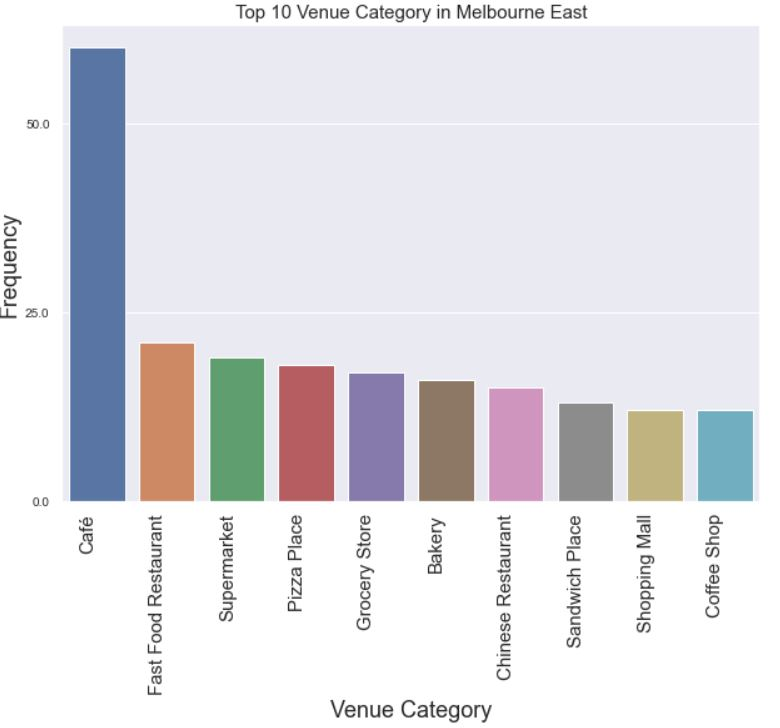

In [314]:
from IPython.display import Image
Image('east_venue.JPG', width=500)

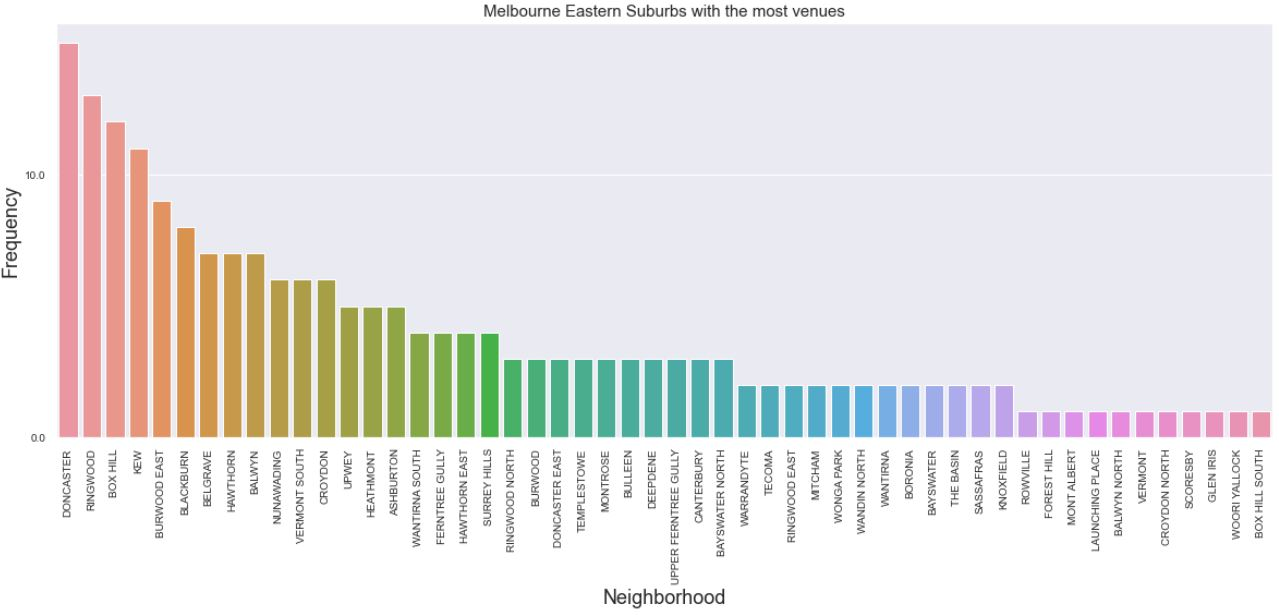

In [316]:
from IPython.display import Image
Image('east_suburbs.JPG', width=1000)

#### Top 5 Eastern Suburbs with most venues

In [320]:
#melb_inner_merged.head()
df_don = melb_inner_merged[melb_inner_merged['LOCALITY'] == 'DONCASTER']
df_ring = melb_inner_merged[melb_inner_merged['LOCALITY'] == 'RINGWOOD']
df_box = melb_inner_merged[melb_inner_merged['LOCALITY'] == 'BOX HILL']
df_kew = melb_inner_merged[melb_inner_merged['LOCALITY'] == 'KEW']
df_bur = melb_inner_merged[melb_inner_merged['LOCALITY'] == 'BURWOOD EAST']

frames10 = [df_don,df_ring,df_box,df_kew,df_bur]

df_east_suburb = pd.concat(frames10)
df_east_suburb

,index,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,1524,DONCASTER,3108,MANNINGHAM,145.124087,-37.784795,Doncaster,Manningham - West,Melbourne - Inner East,Greater Melbourne,3.0,Café,Supermarket,Sandwich Place,Coffee Shop,Chinese Restaurant,Shopping Mall,Fast Food Restaurant,Pizza Place,Grocery Store,Bakery
20,1734,RINGWOOD,3134,MAROONDAH,145.233411,-37.811518,Ringwood,Maroondah,Melbourne - Outer East,Greater Melbourne,6.0,Fast Food Restaurant,Coffee Shop,Café,Supermarket,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Chinese Restaurant,Bakery
21,1532,BOX HILL,3128,WHITEHORSE,145.126095,-37.821522,Box Hill,Whitehorse - West,Melbourne - Inner East,Greater Melbourne,4.0,Chinese Restaurant,Bakery,Supermarket,Shopping Mall,Pizza Place,Grocery Store,Café,Sandwich Place,Fast Food Restaurant,Coffee Shop
8,1519,KEW,3101,BOROONDARA,145.033193,-37.803428,Kew,Boroondara,Melbourne - Inner East,Greater Melbourne,6.0,Café,Grocery Store,Fast Food Restaurant,Chinese Restaurant,Supermarket,Sandwich Place,Shopping Mall,Pizza Place,Coffee Shop,Bakery
25,1536,BURWOOD EAST,3151,WHITEHORSE,145.150412,-37.853585,Burwood East,Whitehorse - West,Melbourne - Inner East,Greater Melbourne,3.0,Supermarket,Café,Shopping Mall,Sandwich Place,Pizza Place,Grocery Store,Bakery,Fast Food Restaurant,Coffee Shop,Chinese Restaurant


### Drawing Key for Map

| circle color | cluster no. | melbourne east |
|------|------|------|
| grey| 0 | supermarket & grocery store | 
| red| 1 | cafe |
| blue| 2 | pizza place | 
| purple| 3 | cafe | 
| orange| 4 | mixture |  
| brown| 5 | sandwich | 
| pink| 6 | fast food | 

In [291]:
melb_east_clusters

**Cafe** (purple & red dot) along with **Fast Food Restaurants** (pink dot) are common in Melbourne Eastern Suburbs. Business owners should be encouraged to open businesses similar to these F&B categories to best match the demand of the community. There is a strong cluster of cafe at the inner eastern suburbs whilst fast food restaurant are futher out east. 

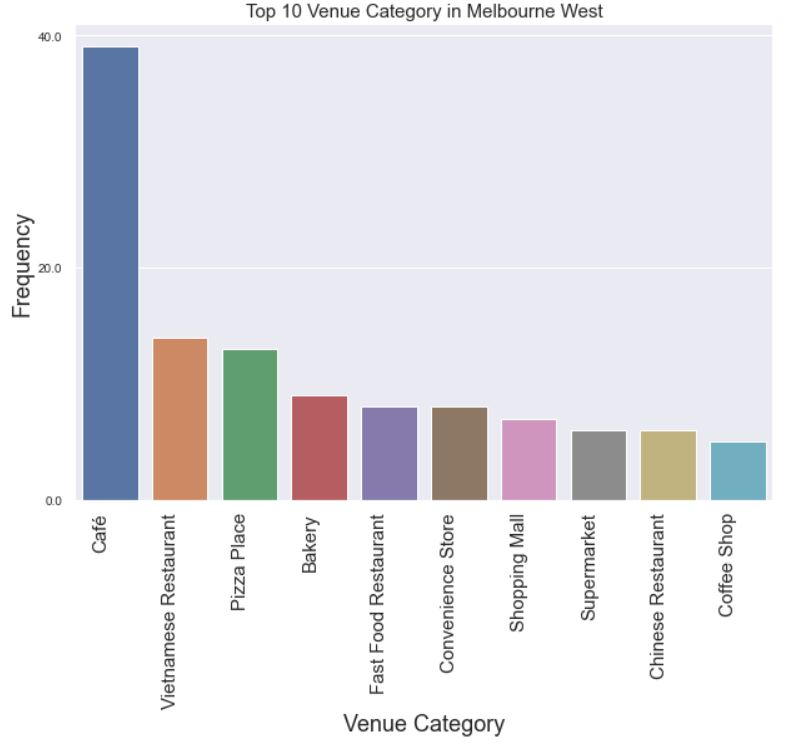

In [322]:
from IPython.display import Image
Image('west_venue.JPG', width=500)

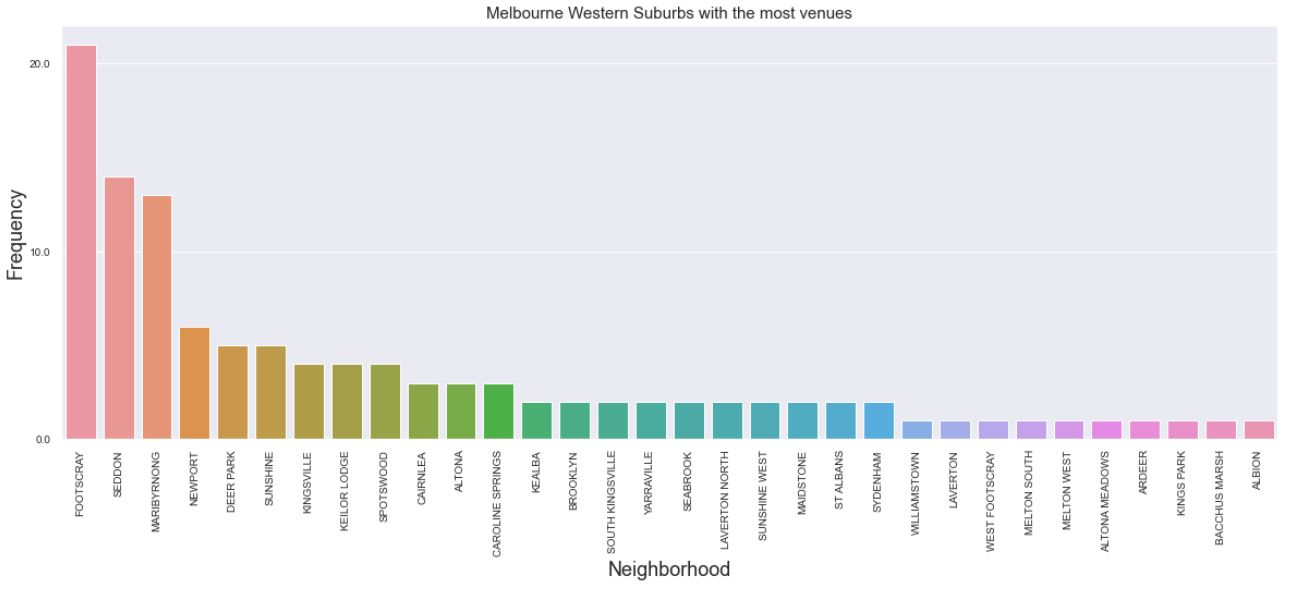

In [325]:
from IPython.display import Image
Image('west_suburbs.JPG', width=1000)

#### Top 5 Western Suburbs with most venues

In [329]:
df_foot = melb_west_merged[melb_west_merged['LOCALITY'] == 'FOOTSCRAY']
df_sed = melb_west_merged[melb_west_merged['LOCALITY'] == 'SEDDON']
df_mari = melb_west_merged[melb_west_merged['LOCALITY'] == 'MARIBYRNONG']
df_new = melb_west_merged[melb_west_merged['LOCALITY'] == 'NEWPORT']
df_deer = melb_west_merged[melb_west_merged['LOCALITY'] == 'DEER PARK']

frames20 = [df_foot,df_sed,df_mari,df_new,df_deer]

df_west_suburb = pd.concat(frames20)
df_west_suburb

,index,LOCALITY,POSTCODE,LGA_NAME,Longitude,Latitude,SA2_NAME16,SA3_NAME16,SA4_NAME16,GCC_NAME16,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,1930,FOOTSCRAY,3011,MARIBYRNONG,144.897195,-37.798156,Footscray,Maribyrnong,Melbourne - West,Greater Melbourne,5.0,Vietnamese Restaurant,Café,Pizza Place,Chinese Restaurant,Bakery,Supermarket,Coffee Shop,Shopping Mall,Fast Food Restaurant,Convenience Store
35,1933,SEDDON,3011,MARIBYRNONG,144.891669,-37.806640,Seddon - Kingsville,Maribyrnong,Melbourne - West,Greater Melbourne,3.0,Café,Pizza Place,Bakery,Supermarket,Coffee Shop,Vietnamese Restaurant,Shopping Mall,Fast Food Restaurant,Convenience Store,Chinese Restaurant
33,1931,MARIBYRNONG,3032,MARIBYRNONG,144.887763,-37.772690,Maribyrnong,Maribyrnong,Melbourne - West,Greater Melbourne,5.0,Café,Fast Food Restaurant,Coffee Shop,Vietnamese Restaurant,Supermarket,Shopping Mall,Chinese Restaurant,Pizza Place,Convenience Store,Bakery
25,1923,NEWPORT,3015,HOBSONS BAY,144.880453,-37.843600,Newport,Hobsons Bay,Melbourne - West,Greater Melbourne,3.0,Café,Pizza Place,Convenience Store,Vietnamese Restaurant,Supermarket,Shopping Mall,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Bakery
3,1901,DEER PARK,3023,BRIMBANK,144.771699,-37.769369,Deer Park - Derrimut,Brimbank,Melbourne - West,Greater Melbourne,5.0,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Café,Supermarket,Shopping Mall,Fast Food Restaurant,Convenience Store,Coffee Shop,Bakery


### Results

| circle color | cluster no. | melbourne west |
|------|------|------|
| grey| 0  | mixture | 
| red| 1  | pizza place | 
| blue| 2  | convenience store | 
| purple| 3 | cafe | 
| orange| 4  | supermarket & shopping mall | 
| brown| 5  | vietnamese | 
| pink| 6  | fast food |

In [293]:
melb_west_clusters

**Cafe** (purple & red dot) along with **Vietnamese Cuisine** (brown dot) are common in Melbourne Western Suburbs. Business owners should be encouraged to open businesses similar to these F&B categories to best match the demand of the community. There is a strong cluster of cafe at the inner western suburbs whilst Vietnamese cuisine in inner and further north west from the CBD.  

## Conclusion <a name="conclusion"></a>

This project has helped in identifying similar F&B categories in both Melbourne's eastern and western suburbs. Cafes has deemed to have a very strong presence in both inner east and west of Melbourne. This can be strongly justified that residents in Melbourne admired the culture and lifestlye of drinking coffee and cafe ambience. 

However, there are two distinct types of cuisine that occurs in both east and western suburbs. The eastern suburbs comprises of more fast food restaurant whilst western suburbs with more vietnamese or asian restuarants. This is significant as it may also reflects the taste and likes of the surrounding community of the preferred type of food. It it possible that ethnicity, cultural and identity could play a factor in this.

It is important to note that however a walkable catchment of 500m is applied to all suburbs, the generalisation may not be accurate to be located at the central/heart of the community that best reflect the high concentration of human activity. It will be better and more accurate when this analysis is carry out again, the adjustment of these suburb centroids should be adjusted too. 